# Analysing and Comparing Automated Algorithm Selection Models using Explainable Artificial Intelligence

In [ ]:
%load_ext autoreload
%autoreload 2
import logging
import matplotlib.pyplot as plt
import pandas as pd
import copy

from aasexplainer.aasexplainer import AASExplainer
from aasexplainer.afmodels import AFModelPair
from aasexplainer.afmodels import AFModelPairRegression
from aasexplainer.afmodels import AFModel
from aasexplainer.afmodels import load_scenario
from aasexplainer.afmodels import get_shap_scenario

from aasexplainer.modelcamparison import AASModelComparison

from aasexplainer.path_handler import *
print('import completed')

logging.getLogger("ASlibScenario").setLevel(logging.ERROR)

import completed


In [4]:
# scenario_strs = ['BNSL-2016','MAXSAT-PMS-2016', 'SAT03-16_INDU', 'QBF-2016', 'TSP-LION2015']
scenario_strs = ['BNSL-2016'] # Only first scenario due to repository size limit

## Model Stats

In [10]:

# Create an empty dataframe
selector_par10 = pd.DataFrame(columns=range(1, 11), index=scenario_strs)
selector_gap = pd.DataFrame(columns=range(1, 11), index=scenario_strs)

# Populate the dataframe with model types
for scenario_str in scenario_strs:
    print(scenario_str)
    scenario_path = get_scenario_path(scenario_str)
    scenario_lib = load_scenario(scenario_path)
    for fold in range(1, 11):
        test_scenario,train_scenario = scenario_lib.get_split(fold)


        model_cur = load_model_only(scenario_str, fold, scenario_lib)

        selector_par10.loc[scenario_str, fold] = model_cur.get_stats(test_scenario = test_scenario, train_scenario = train_scenario)['par10']
        selector_gap.loc[scenario_str, fold] = model_cur.get_stats(test_scenario = test_scenario, train_scenario = train_scenario)['gap_closed']
        


BNSL-2016
MAXSAT-PMS-2016
SAT03-16_INDU
QBF-2016
TSP-LION2015


In [15]:
selector_par10

,1,2,3,4,5,6,7,8,9,10
BNSL-2016,1396.515085,789.463644,2141.830593,2629.482203,3368.553983,839.88822,793.482966,2100.779492,2153.425556,2173.155763
MAXSAT-PMS-2016,385.924364,385.668302,338.237193,393.618909,1003.9375,391.617455,81.942632,357.889273,14.968,972.932759
SAT03-16_INDU,3642.821491,1720.429663,2191.664543,2779.611916,2904.382661,2707.770832,2158.387812,3444.191136,1371.340737,3172.479274
QBF-2016,694.453013,493.910513,254.142805,473.727205,269.41411,977.150286,752.359216,1185.720078,689.523575,478.035351
TSP-LION2015,42.396061,55.972251,279.403065,53.97574,52.652242,45.852797,45.330145,47.590788,46.433855,157.058215


In [16]:
selector_gap

,1,2,3,4,5,6,7,8,9,10
BNSL-2016,0.869903,0.877067,0.74557,0.720633,0.665806,0.938149,0.941501,0.766401,0.774,0.818044
MAXSAT-PMS-2016,0.494755,0.544714,0.514336,0.530237,0.433792,0.526234,0.947299,0.520385,0.986449,0.417627
SAT03-16_INDU,0.30009,0.550229,0.416043,0.303764,0.365877,0.488533,0.393156,0.165017,0.689398,-0.085366
QBF-2016,0.726094,0.828726,0.867041,0.669947,0.913107,0.744997,0.766499,0.641534,0.70017,0.798989
TSP-LION2015,-0.037888,-0.028307,-0.009049,-0.175041,-0.029253,0.795478,-0.018695,0.78659,-0.040574,-0.006638


## Comparison

In [5]:
scenario_strs = ['BNSL-2016','MAXSAT-PMS-2016', 'SAT03-16_INDU', 'QBF-2016', 'TSP-LION2015']
scenario_strs = ['BNSL-2016'] # Only first scenario due to repository size limit

In [2]:
# Load Shapley values
comps = {}

for scenario_str in ['BNSL-2016']:
    print(scenario_str)
    scenario_path = get_scenario_path(scenario_str)
    scenario_lib = load_scenario(scenario_path)
    features_per_split = 20
    shap_scenario = get_shap_scenario(scenario_lib, features_per_split)
    exps = []
    for fold in range(1, 11):
        test_scenario,train_scenario = scenario_lib.get_split(fold)

        model_cur = load_model_only(scenario_str, fold, scenario_lib)
        path_shap = get_shap_path(scenario_str, fold, "Final200")

        exp = AASExplainer(shap_scenario, model_cur, background_scenario = scenario_lib, path_shap = path_shap)
        exps.append(exp)

    comps[scenario_str] = comp = AASModelComparison(exps)     



BNSL-2016


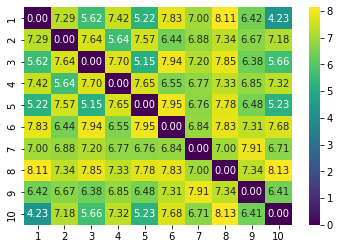

In [19]:
comps['BNSL-2016'].plot_distances_topk(k=10)

In [9]:
distance_values = {}

for scenario_str in scenario_strs:
    print(scenario_str)
    scenario_path = get_scenario_path(scenario_str)
    scenario_lib = load_scenario(scenario_path)
    features_per_split = 20
    shap_scenario = get_shap_scenario(scenario_lib, features_per_split)
    exps = []
    for fold in range(1, 11):
        test_scenario,train_scenario = scenario_lib.get_split(fold)

        model_cur = load_model_only(scenario_str, fold, scenario_lib)
        path_shap = get_shap_path(scenario_str, fold, "Final200")

        exp = AASExplainer(shap_scenario, model_cur, background_scenario = scenario_lib, path_shap = path_shap)
        exps.append(exp)

    comp = AASModelComparison(exps) 
    distance_values[scenario_str] = comp.values_distances_topk(k=10) 


BNSL-2016
MAXSAT-PMS-2016
SAT03-16_INDU
QBF-2016
TSP-LION2015


(0.0, 10.0)

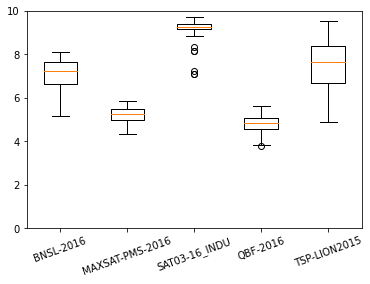

In [8]:
fig, ax = plt.subplots()
ax.boxplot(distance_values.values())
ax.set_xticklabels(distance_values.keys())
plt.xticks(rotation=20)
plt.ylim(0, 10)